# 이상을 탐지하는 여러 방법론들 

- (1) 통계적 기법
- (2) 거리, 밀도 기반 이상 탐지
- (3) 분류 모델 기반 이상 탐지
- (4) 차원축소, 시각화 기반 이상 탐지
- (5) 기업 알고리즘 기반 이상 탐지
- (6) 시계열 분해 기반 이상 탐지 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 통계적 기법 

### Ch01-(1). 3-sigma rule 이상탐지 

- 데이터의 분포를 정규분포로 가정하고, 평균으로부터 (표준편차 * 시그마 계수)를 벗어나면 outlier라고 판단 
- 다차원 데이터에 적용하기 어려우며 feature간 상호관계 파악하기 어려움 
- 현업사례 : 공정 센서 데이터 이상탐지, 검사 및 측정 데이터 이상탐지 

In [ ]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.DataFrame({"name": ['KATE', 'LOUISE', 'JANE', 'JASON', 'TOM', 'JACK'], 
                   "weight": ['59', '61', '55', '66', '52', '110'], 
                   "height": ['120', '123', '115', '145', '64', '20']})
df

,name,weight,height
0,KATE,59,120
1,LOUISE,61,123
2,JANE,55,115
3,JASON,66,145
4,TOM,52,64
5,JACK,110,20


In [ ]:
df['weight'] = df['weight'].astype(int)
df['height'] = df['height'].astype(int)

In [ ]:
df['UCL_W'] = df['weight'].mean() + 2*df['weight'].std()
df['LCL_W'] = df['weight'].mean() - 2*df['weight'].std()

df['UCL_H'] = df['height'].mean() + 2*df['height'].std()
df['LCL_H'] = df['height'].mean() - 2*df['height'].std()
df

,name,weight,height,UCL_W,LCL_W,UCL_H,LCL_H
0,KATE,59,120,110.237152,24.096182,190.986254,4.680412
1,LOUISE,61,123,110.237152,24.096182,190.986254,4.680412
2,JANE,55,115,110.237152,24.096182,190.986254,4.680412
3,JASON,66,145,110.237152,24.096182,190.986254,4.680412
4,TOM,52,64,110.237152,24.096182,190.986254,4.680412
5,JACK,110,20,110.237152,24.096182,190.986254,4.680412


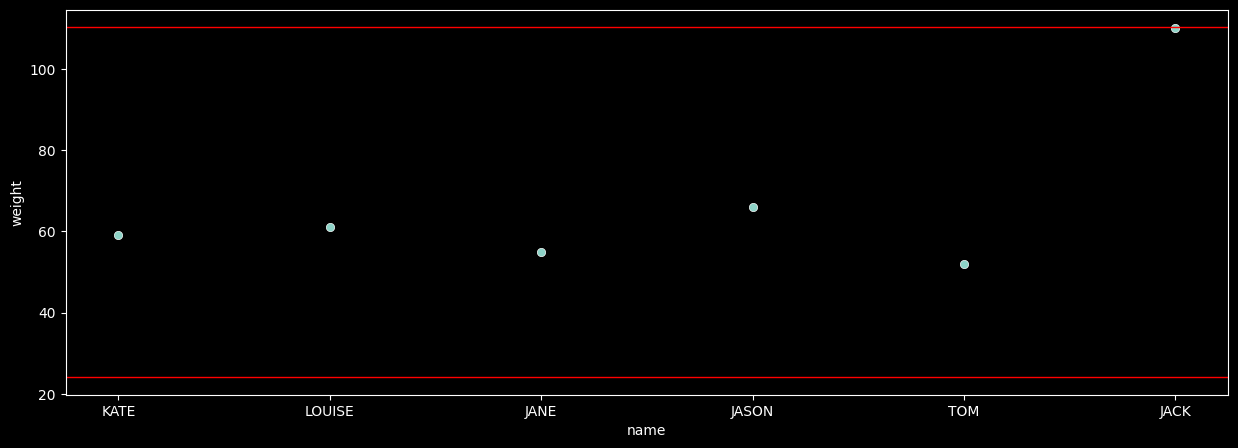

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.style.use(['dark_background'])

sns.scatterplot(x=df['name'], y=df['weight']);
plt.axhline(y=df['UCL_W'][0], color='r', linewidth=1)
plt.axhline(y=df['LCL_W'][0], color='r', linewidth=1)
plt.gcf().set_size_inches(15, 5)

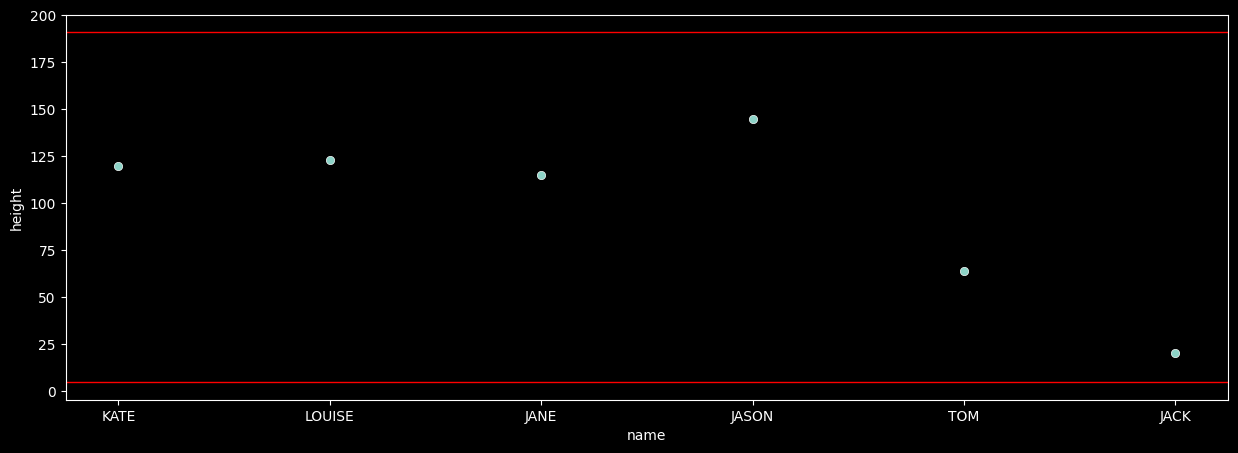

In [ ]:
sns.scatterplot(x=df['name'], y=df['height']);
plt.axhline(y=df['UCL_H'][0], color='r', linewidth=1)
plt.axhline(y=df['LCL_H'][0], color='r', linewidth=1)
plt.gcf().set_size_inches(15, 5)

### Ch01-(2). Box plot 이상탐지

- 최소 정상값, 1사분위수, 중앙값, 3사분위수, 최대 정상값을 나타내는 시각화 방법 
- 분포를 확인하기는 어려움. 가운데 선 평균 아니고 중앙값
- 현업사례 : EDA 단계에서 많이 사용됨. 공정 센서 데이터 이상탐지, 검사 및 측정 데이터 이상탐지 


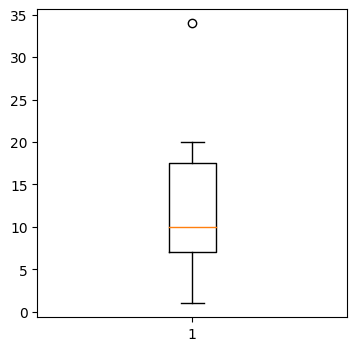

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['default'])

test = pd.DataFrame([1, 5, 9, 10 ,15, 20, 34])
fig, ax = plt.subplots(1,1, figsize=(4,4))
a = list(test[0])
box = ax.boxplot(a);

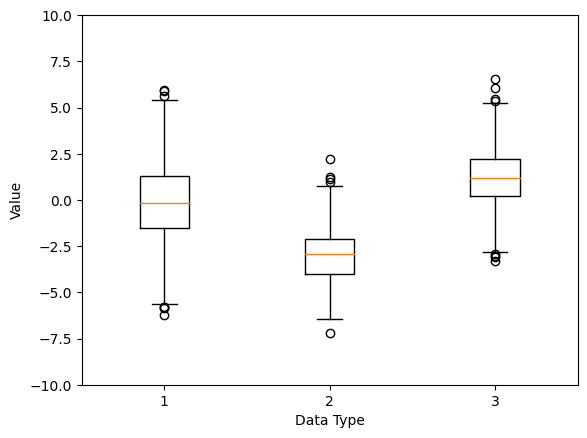

In [ ]:
import numpy as np

data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

labels = ['data_a', 'data_b', 'data_c']

fig, ax = plt.subplots() ;

box = ax.boxplot([data_a, data_b, data_c], whis=1.5);
ax.set_ylim(-10.0, 10.0);
ax.set_xlabel('Data Type');
ax.set_ylabel('Value');

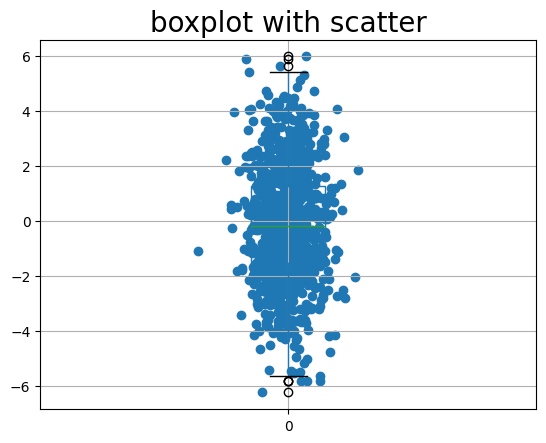

In [ ]:
data_a_df = pd.DataFrame(data_a)
data_a_df.boxplot()

# box plot with scatter
for i,d in enumerate(data_a_df):
  y = data_a_df[d]
  x = np.random.normal(i+1, 0.04, len(y))
  plt.scatter(x,y)
plt.title('boxplot with scatter', fontsize=20)
plt.show()

In [ ]:
# 이상치 검출하기
def get_box_plot_data(labels, bp):
  rows_list = []

  for i in range(len(labels)):
    dict1 = {}
    dict1['label'] = labels[i]
    dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
    dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
    dict1['median'] = bp['medians'][i].get_ydata()[1]
    dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
    dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
    dict1['Outlier'] = bp['fliers'][i].get_ydata()
    rows_list.append(dict1)
    #print(rows_list)

  return pd.DataFrame(rows_list)

In [ ]:
get_box_plot_data(labels, box)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,Outlier
0,data_a,-5.618969,-1.535254,-0.180653,1.272167,5.408850,"[-5.807519519275533, -5.7946120727429715, -5.8..."
1,data_b,-6.459149,-4.020328,-2.941380,-2.097108,0.758443,"[-7.22112547307656, 1.2281791578345578, 2.1950..."
2,data_c,-2.835852,0.207723,1.204214,2.238913,5.240953,"[-3.0993652708868265, -3.042541262905414, -2.9..."


In [ ]:
fliers = [item.get_ydata() for item in box['fliers']]
fliers

[array([-5.80751952, -5.79461207, -5.82685606, -6.22609369,  5.88738767,
         5.61873347,  5.96945124]),
 array([-7.22112547,  1.22817916,  2.19508998,  1.10525731,  0.98985421]),
 array([-3.09936527, -3.04254126, -2.95128968, -3.28630788,  6.07962645,
         5.33921241,  6.53673507,  5.44641008])]

## 거리, 밀도 기반 이상탐지 

### Ch02-(1). 마할라노비스 거리 이상탐지 

- 중심점까지의 거리를 기준으로 이상치를 식별하는 방법. 기존에 알고있는 유클리드 거리에 공분산 계산이 더해진 개념 
- 데이터의 분포를 고려한 이상치 탐지 가능, 변수간의 상관성이 명확히 알려져 있지 않은 경우엔 적용하기 어려움.
- 현업사례 : 일정한 품질로 제품을 생산하는 공정에서 이상 제품 탐지. 2차전지/태양열 cell 등. 

** 사용방법
- 일반적으로 일정한 분포(gaussian distiributed)로부터 정상적인 데이터를 추정.
- Covariance.EllipticEnvelolpe를 사용하여 공분산 추정을 하고,  중심 데이터들을 타원형에 fit. 그리고 central mode를 벗어난 데이터는 제외.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# 랜덤 데이터 생성
X, _ = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)

# 이상치 Input
X[0,0] = 10
X[0,1] = -10

outlier_detector = EllipticEnvelope(contamination=.5)  # contamination -> the proportion of outliers in the data set
outlier_detector.fit(X)

# -1 이면 outlier로 간주.
pred = outlier_detector.predict(X)
pred

array([-1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1])

In [ ]:
df = pd.DataFrame(X, columns=['col1', 'col2'])
df['outlier'] = pred
df.head(5)

,col1,col2,outlier
0,10.000000,-10.000000,-1
1,-0.813399,3.546974,-1
2,-3.103674,3.902024,-1
3,-1.429465,5.168501,1
4,0.868766,4.157855,-1


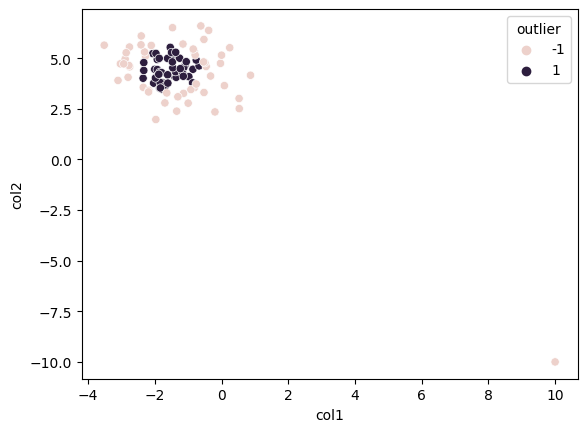

In [ ]:
sns.scatterplot(x='col1', y='col2', hue='outlier', data=df);

### Ch02-(2). KNN 이상탐지 

- 수치 기반 데이터 분류 작업에서 성능 우수, 카테고리컬 데이터를 위한 추가 처리가 필요함.
- PyOD(python outlier detection) 패키지 활용. 표준화 진행
- 현업사례 : 이미지 처리, 영상 인식, 상품 추천, 패턴 이식, 이상 탐지 

In [ ]:
! pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=29b328cdbd5cc8f40e8516b02cde079a2da3b75176050b93d3a5a40dd38c7f2c
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


In [ ]:
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print
from pyod.utils.data import generate_data
from pyod.models.knn import KNN

contamination = 0.1  # percentage of outliers
n_train = 200      
n_test = 100       

X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

In [ ]:
X_test.shape, y_test.shape

((100, 2), (100,))

In [ ]:
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

In [ ]:
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

In [ ]:
print("On Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


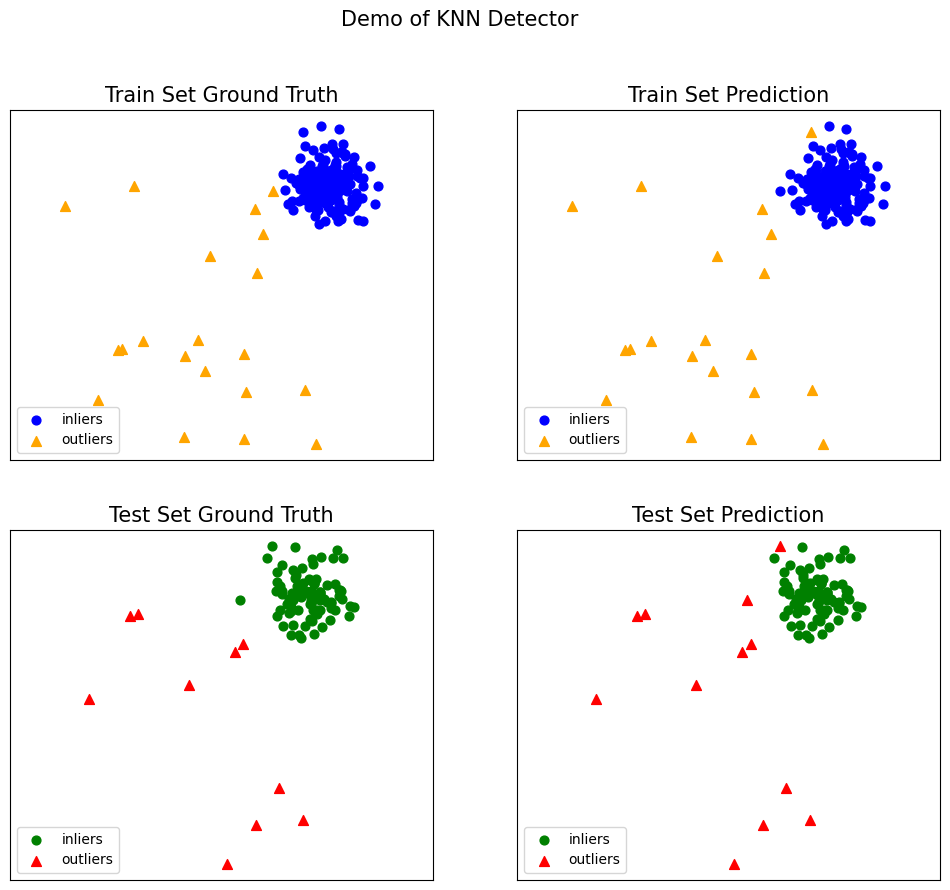

In [ ]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)

### Ch02-(3). LOF 이상 탐지

- Density-based Methods LOF(Local Outlier Factor)
- Global 관점에서 이상탐지의 단점을 극복하기 위해 Local 정보를 이용하여 이상인지 판별.
- LOF < 1 : 밀도가 높은 분포. 
- LOF = 1 : 이웃 관측치와 비슷한 분포. 
- LOF > 1 : 밀도가 낮은 분포, 크면 클수록 이상치 정도가 크다. 

- 굉장히 밀집한 클러스터에서 조금만 떨어져 있어도 이상치로 탐지. 
- 현업사례 : 공정 데이터 이상탐지, 공정 센서 데이터 실시간 이상탐지

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

df_train = pd.DataFrame([
        [2, 1, 3],
        [3, 2, 5],
        [3, 4, 7],
        [5, 5, 10],
        [7, 5, 12],
        [2, 5, 7],
        [8, 9, 13],
        [9, 10, 13],
        [6, 5, 12], # ▶ 이상값 추가
        [7, 6, 13], # ▶ 이상값 추가
        [6, 12, 12]
    ], columns=['hour', 'attendance', 'score'])

df_test = pd.DataFrame([
        [9, 2, 13],
        [6, 10, 12],
        [2, 4, 6]
    ], columns=['hour', 'attendance', 'score'])

In [ ]:
outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.2)
y_predict = outlier.fit_predict(df_train)
df_train['outlier'] = y_predict
df_train

,hour,attendance,score,outlier
0,2,1,3,-1
1,3,2,5,-1
2,3,4,7,1
3,5,5,10,1
4,7,5,12,1
5,2,5,7,1
6,8,9,13,1
7,9,10,13,1
8,6,5,12,1
9,7,6,13,1


In [ ]:
outlier.negative_outlier_factor_

array([-1.26622122, -1.17626691, -1.1053571 , -0.98698008, -0.93100953,
       -1.1053571 , -1.08159108, -1.02235872, -0.87139861, -0.97624582,
       -1.16516679])

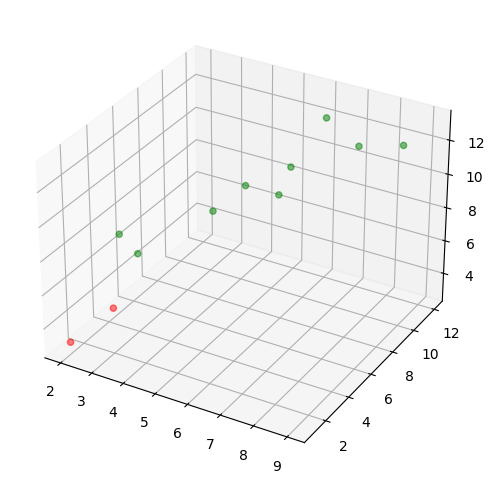

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')  # Axes3D 객체를 만든다

df_red = df_train[df_train['outlier'] == -1]
df_green = df_train[df_train['outlier'] == 1]

ax.scatter(df_red['hour'], df_red['attendance'],df_red['score'], color = 'r', alpha = 0.5);
ax.scatter(df_green['hour'], df_green['attendance'],df_green['score'], color = 'g', alpha = 0.5);

## 분류 모델 기반 이상탐지 

### Ch03-(1). Isolation Forest 이상탐지 

- 의사결정나무를 지속적으로 분기시키면서 모든 데이터 관측치의 고립 정도 여부에 따라 이상치 판별.
- 비정상 데이터라면? 루트에서 가까운 단계에서 고립됨.
- 특정 관측치가 고립되는 Leaf 노드까지의 거리를 Outlier Score로 정의.
- Train data에 이상치가 포함되지 않아도 잘 동작함! 
- 현업사례 : 로그 데이터 이상탐지, 품질관리를 위한 이상탐지 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)  # 1000*2 생성 
X_train = np.r_[X_train + 3, X_train]  # np.r_ = 배열 붙이기 
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

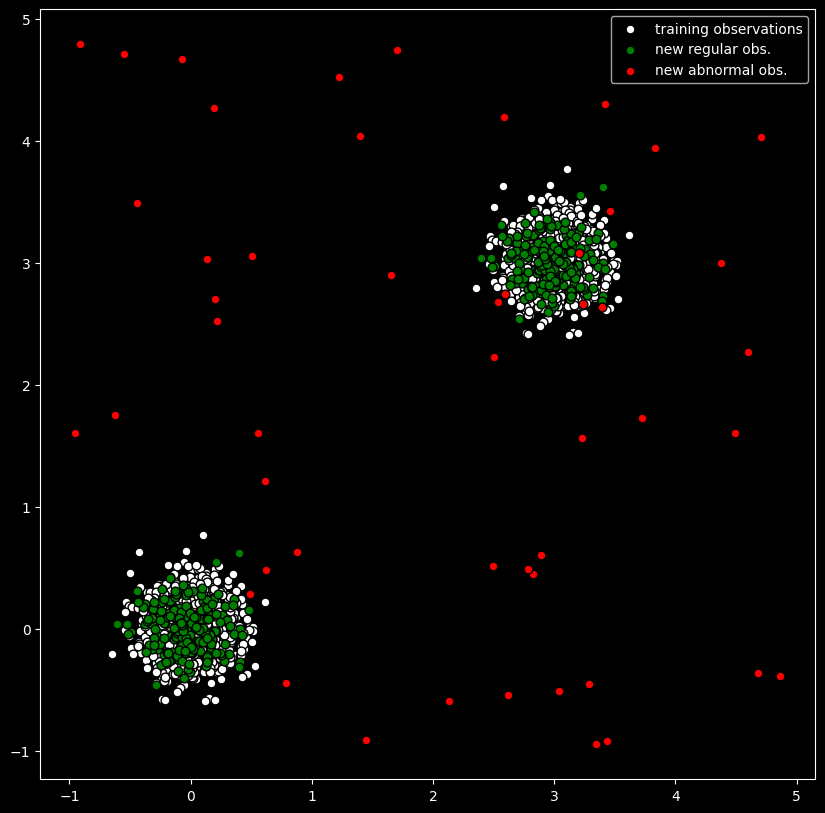

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = [10, 10]

p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*2, edgecolor='k', label='training observations')

# Test set, 정상 Sample로 구성
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*2, edgecolor='k', label='new regular obs.')

# Outlier set
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*2, edgecolor='k', label='new abnormal obs.')

plt.legend()

In [ ]:
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=100, contamination = 0.05, random_state=42)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [ ]:
y_pred_outliers

array([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1])

In [ ]:
clf.decision_function(X_outliers)  # score 낮을수록 outlier 

array([-0.07397915, -0.10344893, -0.06839828,  0.00754778, -0.02594477,
       -0.10344893, -0.03858639,  0.02753773, -0.06375707, -0.06988794,
       -0.09467105, -0.07814982, -0.08015771, -0.04450317,  0.12127897,
       -0.08251879, -0.0615171 , -0.0839109 , -0.08435337, -0.01324472,
       -0.09467105, -0.08594633, -0.09647411, -0.09101499, -0.0648407 ,
       -0.08185362, -0.0200524 , -0.03235862, -0.06813104, -0.07117076,
       -0.09423924, -0.02588178, -0.05521445, -0.08650631, -0.03681947,
       -0.04963059, -0.09951997, -0.09951997, -0.08342488, -0.03517144,
       -0.06276045, -0.08643544, -0.08145166, -0.05683871, -0.06592612,
       -0.00561074, -0.08398277, -0.03698318, -0.02039574,  0.00107149])

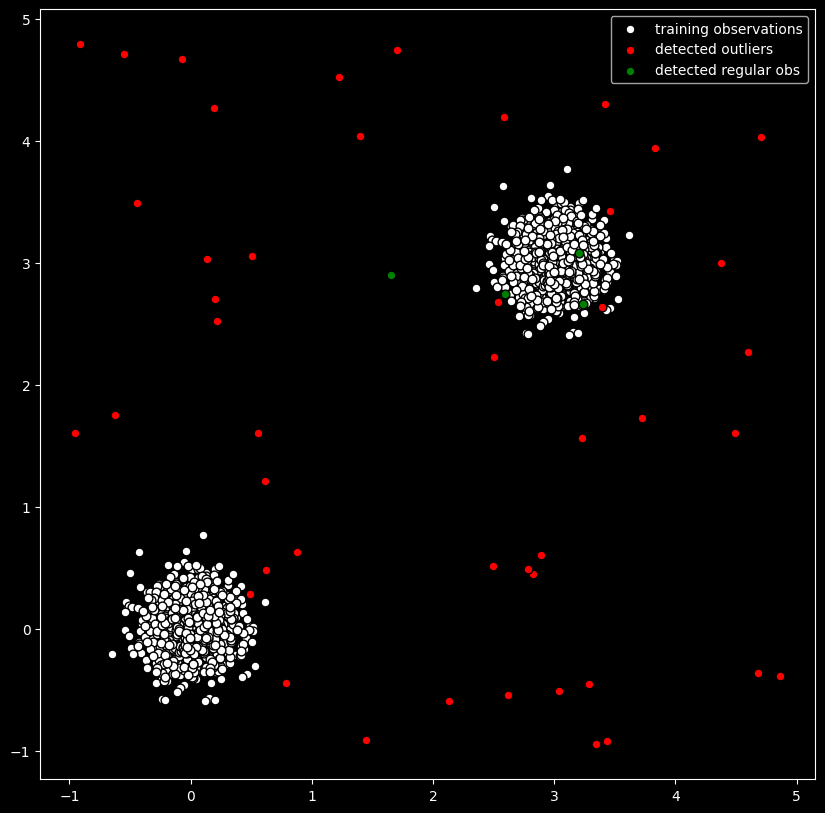

In [ ]:
X_outliers = X_outliers.assign(y = y_pred_outliers)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")
plt.legend()
plt.gcf().set_size_inches(10, 10)

In [ ]:
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.96
이상치 데이터셋에서 정확도: 0.92


### Ch03-(2). One-Class SVM 이상탐지 

- 데이터를 N차원 좌표축으로 표현하고, 원점과의 거리를 기준으로 초평면을 그어 분류하는 방법.
- OCSVM은 원점을 기준으로 정상과 이상에 대한 Hyper Plane을 찾음. 
- 현업사례 : 금융 이상 거래 탐지, 온라인 서명 검증 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

rng = np.random.RandomState(50)

X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

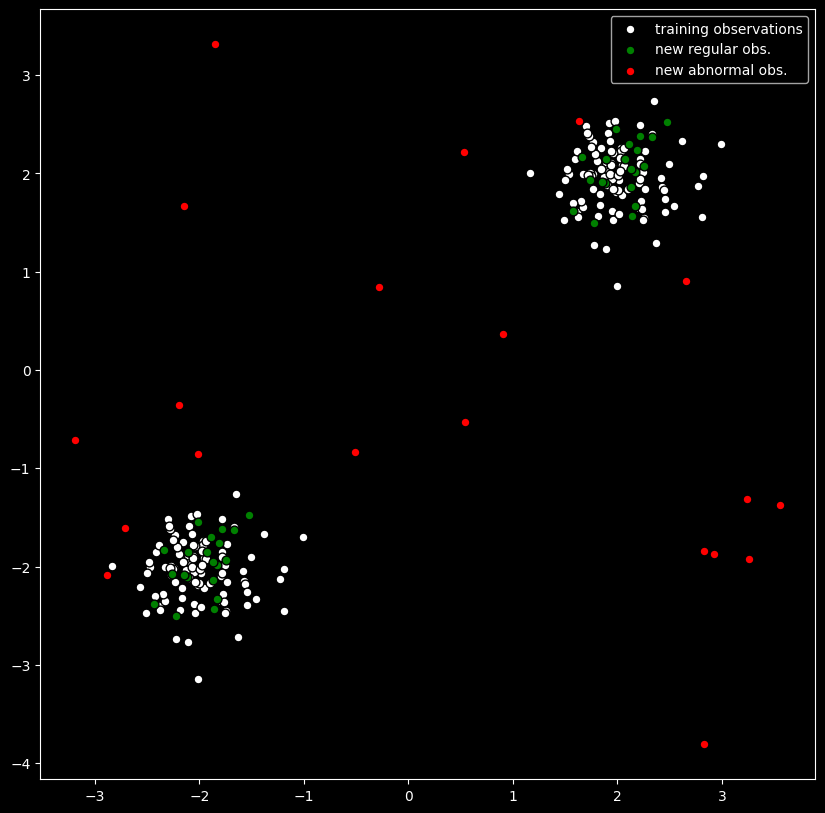

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

plt.rcParams['figure.figsize'] = [10, 10];
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*2, edgecolor='k', label='training observations');

p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*2, edgecolor='k', label='new regular obs.');

p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*2, edgecolor='k', label='new abnormal obs.');

plt.legend();

In [ ]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

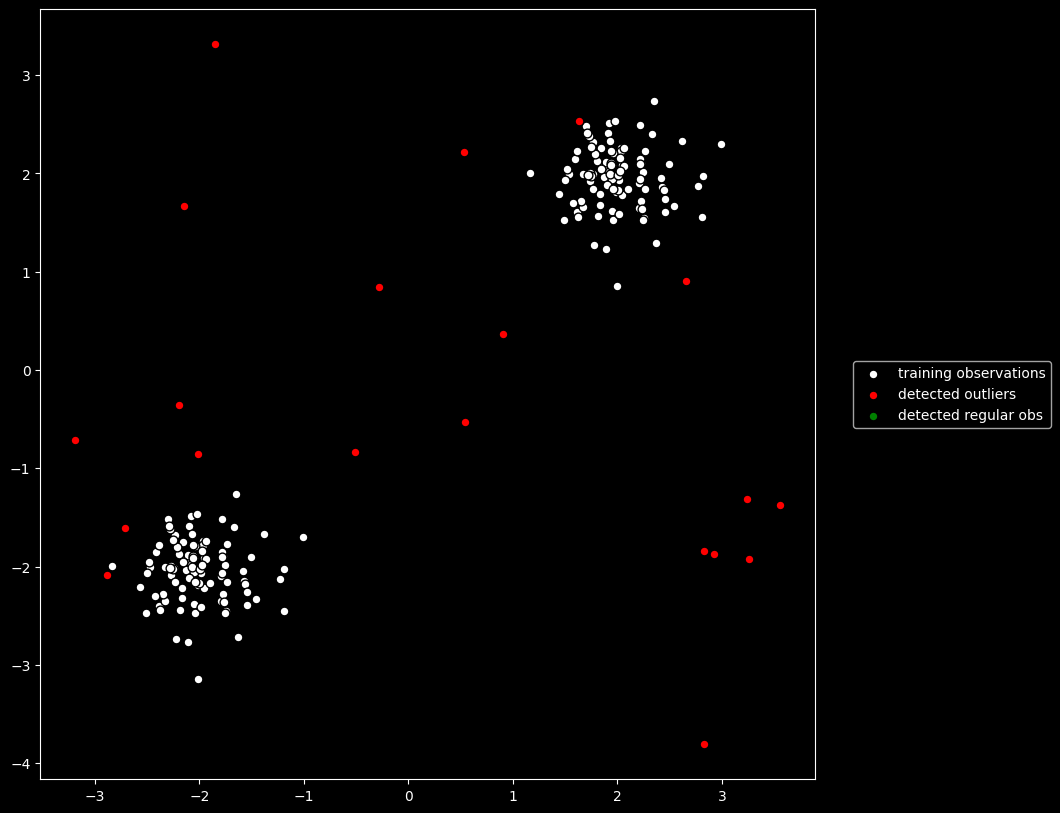

In [ ]:
X_outliers = X_outliers.assign(y = y_pred_outliers)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")

plt.legend(loc='center left', bbox_to_anchor=(1.04,0.5));
plt.gcf().set_size_inches(10, 10)

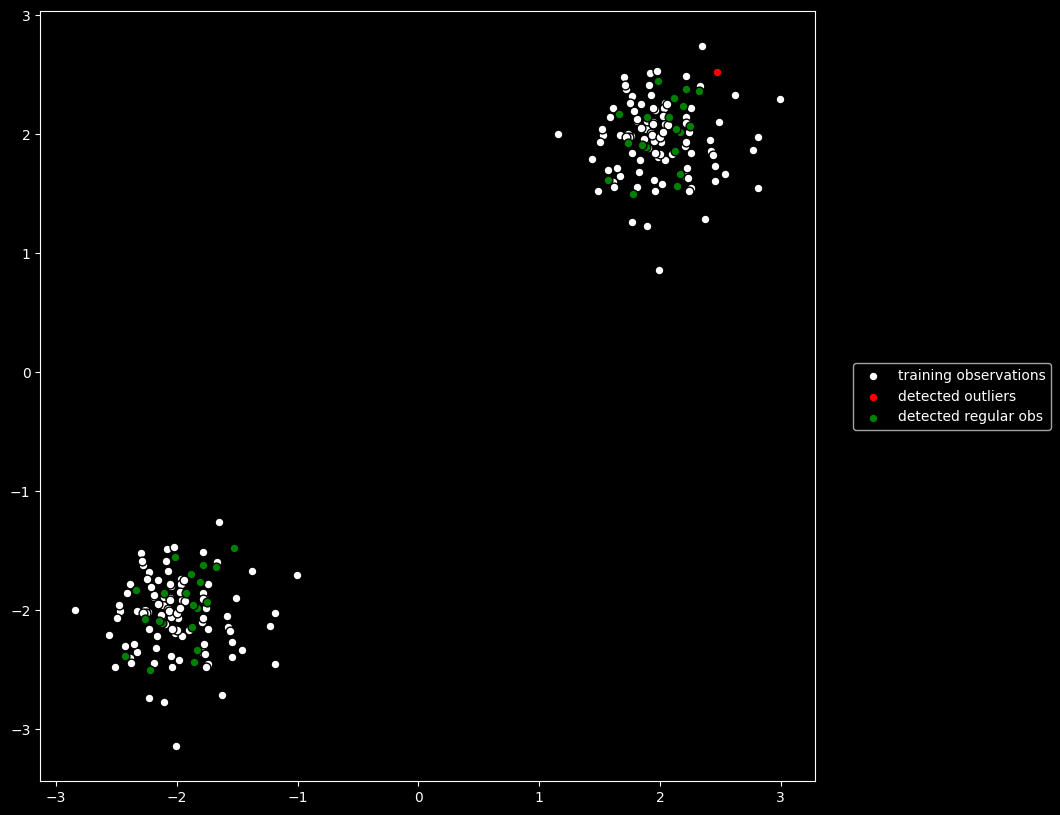

In [ ]:
X_test = X_test.assign(y = y_pred_test)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_test.loc[X_test.y == -1, ['x1']], 
                 X_test.loc[X_test.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_test.loc[X_test.y == 1, ['x1']], 
                 X_test.loc[X_test.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")

plt.legend(loc='center left', bbox_to_anchor=(1.04,0.5));
plt.gcf().set_size_inches(10, 10)

In [ ]:
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.975
이상치 데이터셋에서 정확도: 1.0


### Ch03-(3). AutoEncoder

- 고차원 데이터의 가장 중요한 특징을 학습. 정상 데이터의 특징을 학습하고, 비정상 데이터를 Input하면 Loss가 커짐. 
- 현업사례 : 시계열 센서 데이터 이상탐지 

In [ ]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

contamination = 0.1  # percentage of outliers
n_train = 20000      # number of training points
n_test = 2000        # number of testing points
n_features = 300     # number of features

X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

In [ ]:
X_train

array([[ 6.43365854,  5.5091683 ,  5.04469788, ...,  4.98920813,
         6.08796866,  5.65703627],
       [ 6.98114644,  4.97019307,  7.24011768, ...,  4.13407401,
         4.17437525,  7.14246591],
       [ 6.96879306,  5.29747338,  5.29666367, ...,  5.97531553,
         6.40414268,  5.8399228 ],
       ...,
       [ 5.35087495, -1.81659515, -3.87781092, ...,  4.98790694,
        -3.2161805 ,  5.57752665],
       [ 4.22748662,  1.06750929, -3.92242323, ..., -2.35742098,
         0.56345982,  1.52321679],
       [ 5.56996897, -0.98037194, -0.3723574 , ..., -5.08390434,
         2.3460687 , -3.08123438]])

In [ ]:
clf_name = 'AutoEncoder'
clf = AutoEncoder(hidden_neurons =[300, 100, 100, 300], epochs=10, contamination=contamination)
clf.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               3

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[300, 100, 100, 300],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f38914d67a0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [ ]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

63/63 [==============================] - 0s 3ms/step


In [ ]:
y_train_pred[0:5], y_train_scores[0:5]  # score가 높을수록 이상치가 가까움 

(array([0, 0, 0, 0, 0]),
 array([7.62491016, 8.30543622, 7.94108788, 8.20727913, 7.22127465]))

In [ ]:
y_test_pred[1950:2000], y_test_scores[1950:2000]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 array([50.64538128, 50.10301315, 50.53063116, 46.67181889, 50.66680288,
        48.81289974, 48.27360027, 47.5916056 , 51.30501506, 49.70452697,
        49.55984414, 47.70848719, 49.48714295, 48.99956044, 51.11052049,
        50.16991355, 51.43702649, 48.31665718, 50.71515377, 50.77624881,
        51.0551028 , 49.87654224, 48.1685861 , 48.81334682, 50.93344746,
        49.74213604, 48.5305019 , 48.53300428, 48.5533475 , 48.67199143,
        48.42724136, 51.05066696, 48.97042057, 49.05072269, 49.15829877,
        49.19478037, 50.64893812, 46.7829769 , 50.76347274, 49.60115613,
        49.65091123, 50.16701232, 45.17374063, 50.65586887, 47.57162149,
        50.9514809 , 48.61925683, 49.44747582, 50.06497586, 47.45055264]))

In [ ]:
pd.Series(y_train_pred).value_counts()

0    18000
1     2000
dtype: int64

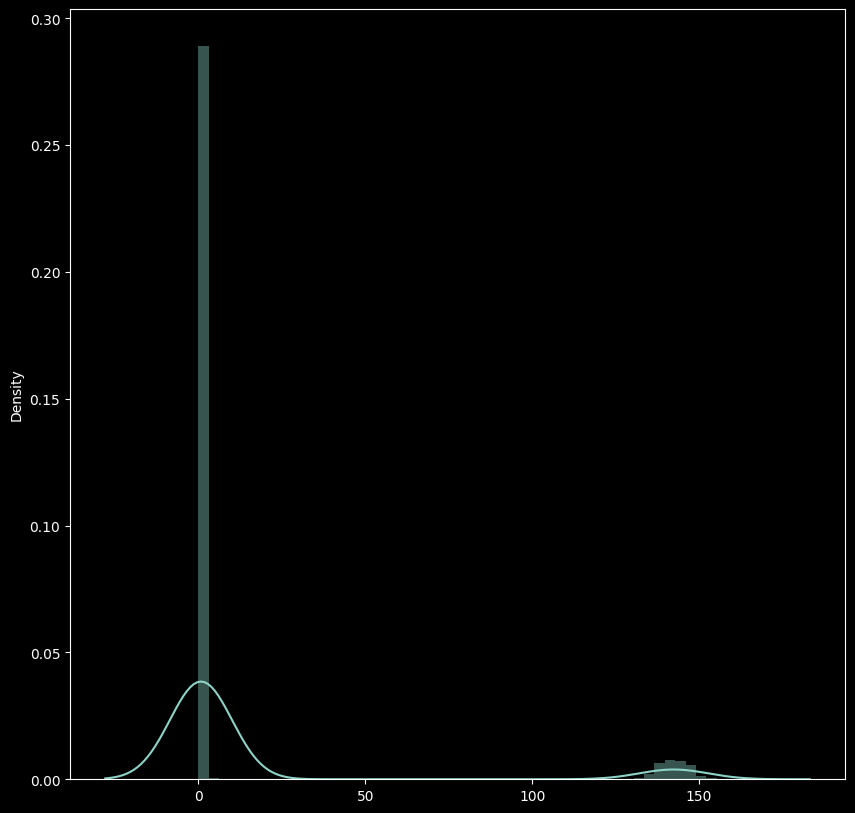

In [ ]:
# threshold 결정을 위한 modified z점수 표준화
def mod_z(col) :
    med_col = col.median()
    med_abs_dev = (np.abs(col - med_col)).median()
    mod_z = 0.7413 * ((col - med_col) / med_abs_dev)
    return np.abs(mod_z)

pd_s = pd.Series(y_test_scores);
mod_z = mod_z(pd_s);
sns.distplot(mod_z);

In [ ]:
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0

On Test Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0


## 차원축소, 시각화 기반 이상 탐지 

### Ch04-(1). PCA 기반 이상탐지 

- 기존 데이터의 유실을 최소화하기 위해 데이터의 분산을 최대화 할 수 있는 초평면을 찾고 데이터 투영 
- 현업사례 : 다양한 검사 공정에서 이상 제품탐지, 데이터 EDA를 통한 클러스터링

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(['target'], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
features = range(pca.n_components_)
feature_df = pd.DataFrame(data=features, columns=['pc_feature'])

variance_df = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['varience'])
pc_feature_df = pd.concat([feature_df, variance_df], axis=1)
pc_feature_df

,pc_feature,varience
0,0,0.729624
1,1,0.228508
2,2,0.036689
3,3,0.005179


<Axes: xlabel='PC1', ylabel='PC2'>

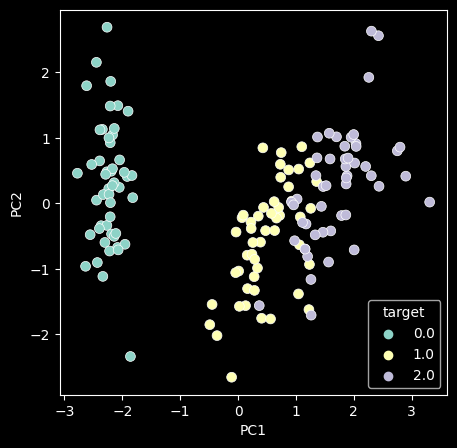

In [ ]:
x = df.drop(['target'], axis=1).reset_index(drop=True)
y = df['target'].reset_index(drop=True).astype(str)

X_ = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

pc_df = pd.DataFrame(pc, columns=['PC1', 'PC2']).reset_index(drop=True)
pc_df = pd.concat([pc_df,y],axis=1)

plt.rcParams['figure.figsize'] = [5,5]
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue=y, legend='brief', s=50, linewidth=0.5)

# 각각의 클러스터 중심에서 멀리 떨어진 data 일수록 이상치임

### Ch04-(1). t-SNE 이상탐지 

- PCA의 단점(선형분석방식이기에 군집화 되어있는 데이터들이 밀집되어 구별하기 어려움) 보완하기 위한 차원 감소 방법. 
- t분포를 이용하여 기준점과 상대점과의 거리를 기준으로 t분포의 확률분포를 유사도로 사용하여 표현.
- 현업사례 : 다양한 검사 공정에서 이상 제품 탐지, 데이터 EDA를 통한 클러스터링 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# ▶ 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
from sklearn.manifold import TSNE

train_df = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# ▶ 2차원 t-SNE 임베딩
# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-23.580931,-0.522060
1,-26.291704,-1.093696
2,-26.193335,0.053057
3,-26.638256,-0.321696
4,-23.545013,-0.941377
...,...,...
145,11.363099,-4.289077
146,10.691204,-1.015444
147,11.097084,-3.357184
148,13.195991,-3.724547


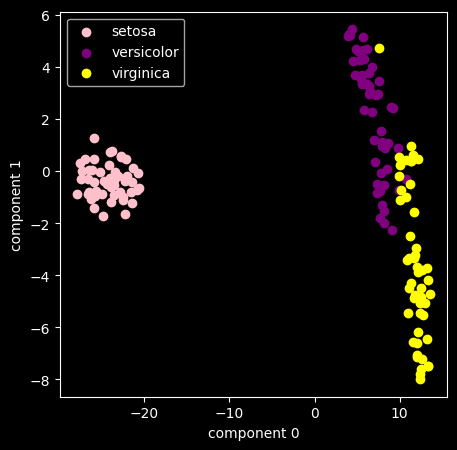

In [ ]:
import matplotlib.pyplot as plt

tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [ ]:
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])
tsne_df

,component 0,component 1,component 2
0,-8.812056,4.025527,0.137585
1,-10.667171,2.833418,-0.668605
2,-9.850709,2.286873,-0.456864
3,-9.928809,2.230897,-1.361420
4,-8.933857,3.903172,0.547563
...,...,...,...
145,6.612414,-0.080440,0.021965
146,3.922685,-0.989921,-0.258834
147,5.771745,-0.440006,-0.129616
148,5.988071,1.072955,0.087076


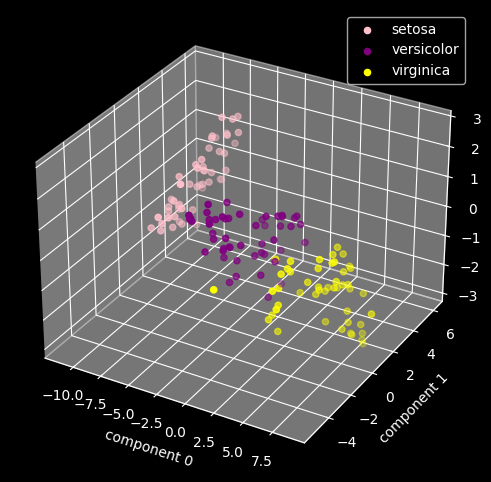

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

tsne_df['target'] = df['target']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

#  ▶ target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

## 기업 알고리즘 기반 이상탐지 

### Ch05-(1). S-H-ESD 

- Seasonal Hybrid ESD
- 핵심개념

(1) Median Absolute Deviation: 관측값에서 중앙값을 뺀 값들의 중앙값, 이상치에 덜 영향을 받는 robust한 분산 측정법

(2) ESD test: 단일 이상치를 테스트하는 통계적 방법, 평균에서 얼마나 멀어져있는지를 데이터의 분산과 대비하여 탐색

(3)  Generalized ESD: 하나의 이상치만 발견

(4) STL: 계절성, 추세, 잔차로 분해하는 기법 

- 현업사례 : SNS 이상탐지 

In [ ]:
!pip install pyculiarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyculiarity: filename=pyculiarity-0.0.7-py32-none-any.whl size=24796 sha256=02df01087eeb6021190c1a4e57fc4a5f39f56433f7915709892d9698637a1837
  Stored in directory: /root/.cache/pip/wheels/e6/e8/71/1e0b21f7de60349a4a9fd70778ec246af1b6a109619e874780
Successfully built pyculiarity


In [ ]:
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,360, 364,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,318.87,319.25,320.13,321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,348.07,349.12,350.55,351.34,350.80,349.10,347.54,346.20,346.20,347.44,348.67,
349, 350, 351]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")
co2.head()

2022-01-31    315.58
2022-02-28    316.39
2022-03-31    316.79
2022-04-30    317.82
2022-05-31    318.39
Freq: M, Name: CO2, dtype: float64

In [ ]:
co2 = pd.DataFrame(co2).reset_index()
co2.columns = ['Time', 'CO2']
co2['Time'] = np.int64(co2['Time'])
co2.head()

,Time,CO2
0,1643587200000000000,315.58
1,1646006400000000000,316.39
2,1648684800000000000,316.79
3,1651276800000000000,317.82
4,1653955200000000000,318.39


In [ ]:
from pyculiarity import detect_ts
from pyculiarity.date_utils import date_format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# anomaly detection을 위한 plot 함수
def plot_ts_anoms(inDF, savepath):
    fig = plt.figure(figsize = (22,5))
    plt.plot(inDF.index, inDF['value'], alpha=0.4, label ='value')
    plt.plot(inDF.index, inDF['anoms'],  color='steelblue', alpha=1, marker='o', markersize='7',
                markeredgewidth = 1, markerfacecolor='None', markeredgecolor='red',label='anomalies')
    if 'expected_value' in inDF.columns:
        plt.plot(inDF.index, inDF['expected_value'], color = 'c', marker = '^', markersize = '7',
                 markeredgewidth = 1, markerfacecolor='None', markeredgecolor='c',label='expected_value')

    plt.legend(); plt.xlabel('time');plt.ylabel('value')

In [ ]:
results = detect_ts(co2, max_anoms=0.10, direction='both')

In [ ]:
timeS_DF = co2.set_index('timestamp')

anomsDF = results['anoms']
anomsDF.drop(['timestamp'], axis = 1, inplace = True)
anomsDF['is_anom'] = True
# anomsDF.columns = ['anom_value','is_anom']

merged_DF = pd.merge(left = timeS_DF, right= anomsDF, left_index=True, right_index=True, how = 'left')
# merged_DF.drop('anom_value',axis = 1,inplace=True)

print('>>> the number of anomaly: ', len(results['anoms']))
print(results['anoms'].head())

>>> the number of anomaly:  0
Empty DataFrame
Columns: [anoms, is_anom]
Index: []


In [ ]:
merged_DF.head()

,value,anoms,is_anom
timestamp,,,
1643587200000000000,315.58,NaN,NaN
1646006400000000000,316.39,NaN,NaN
1648684800000000000,316.79,NaN,NaN
1651276800000000000,317.82,NaN,NaN
1653955200000000000,318.39,NaN,NaN


In [ ]:
merged_DF.index = pd.to_datetime(merged_DF.index)
merged_DF

,value,anoms,is_anom
timestamp,,,
2022-01-31,315.58,NaN,NaN
2022-02-28,316.39,NaN,NaN
2022-03-31,316.79,NaN,NaN
2022-04-30,317.82,NaN,NaN
2022-05-31,318.39,NaN,NaN
...,...,...,...
2051-01-31,347.44,NaN,NaN
2051-02-28,348.67,NaN,NaN
2051-03-31,349.00,NaN,NaN


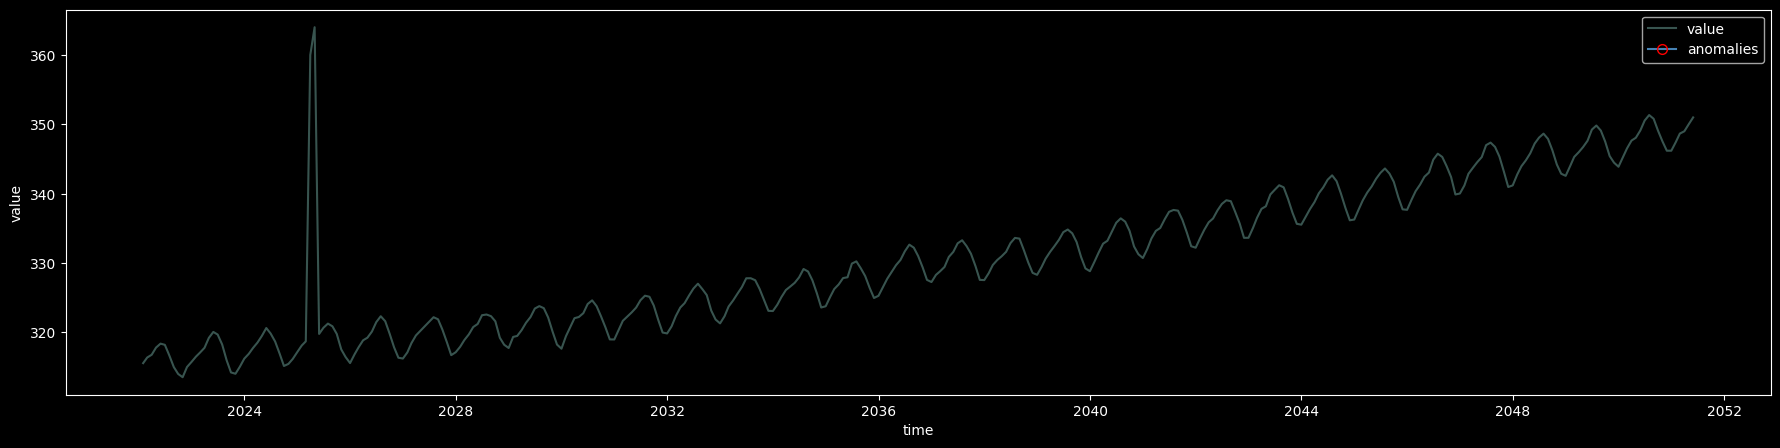

In [ ]:
plt.style.use(['dark_background'])
plot_ts_anoms(merged_DF, 'a')

### Ch05-(2). RRCF(Robust Random Cut Forest) 

- Isolation Forest와 작동 방식은 유사하나, 작은 차이가 엄청난 기여를 함. 
- Feature p를 선택할 때, uniform random하게 뽑는 대신, 각 feature가 갖는 값의 범위에 따라 확률 다르게 부여하여 선택.
- 시간에 따라 분포가 점점 달라지는 데이터에 대응하여 트리를 만들 수 있게됨.
- 현업사례 : 장비 장애 이력 활용 사전 이상탐지

In [91]:
!pip install rrcf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.3-py3-none-any.whl size=9809 sha256=b5a9f6e7ab98a86a2afd0afcb359acd2548528a40ea27759ec655e6c90e6a7ac
  Stored in directory: /root/.cache/pip/wheels/29/74/1d/0187b994a5def8898eef5bfd4882fe4b23f6e4dc28f2e0f0b2
Successfully built rrcf


In [92]:
np.random.seed(0)
n = 2010
d = 3

# Hyper parameters
num_trees = 100
tree_size = 256

# Generate data
X = np.zeros((n, d))
X[:1000,0] = 5
X[1000:2000,0] = -5
X += 0.01*np.random.randn(*X.shape)
size=(n // tree_size, tree_size)

## 시계열 분해 기반 이상탐지

### Ch06-(1). STL 

- 시계열 분해! 
- 덧셈분해 -> y = S+T+R (trend와 seasonal의 관계가 없다)
- 곱셈분해 -> y = S X T X R (trend가 상승함에 따라 변동폭이 변화함)
- 현업사례 : 시계열, 시간 종속 데이터 이상탐지 

In [93]:
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,318.87,319.25,320.13,321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,348.07,349.12,350.55,351.34,350.80,349.10,347.54,346.20,346.20,347.44,348.67,
400, 450, 460]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")
co2.head()

2022-01-31    315.58
2022-02-28    316.39
2022-03-31    316.79
2022-04-30    317.82
2022-05-31    318.39
Freq: M, Name: CO2, dtype: float64

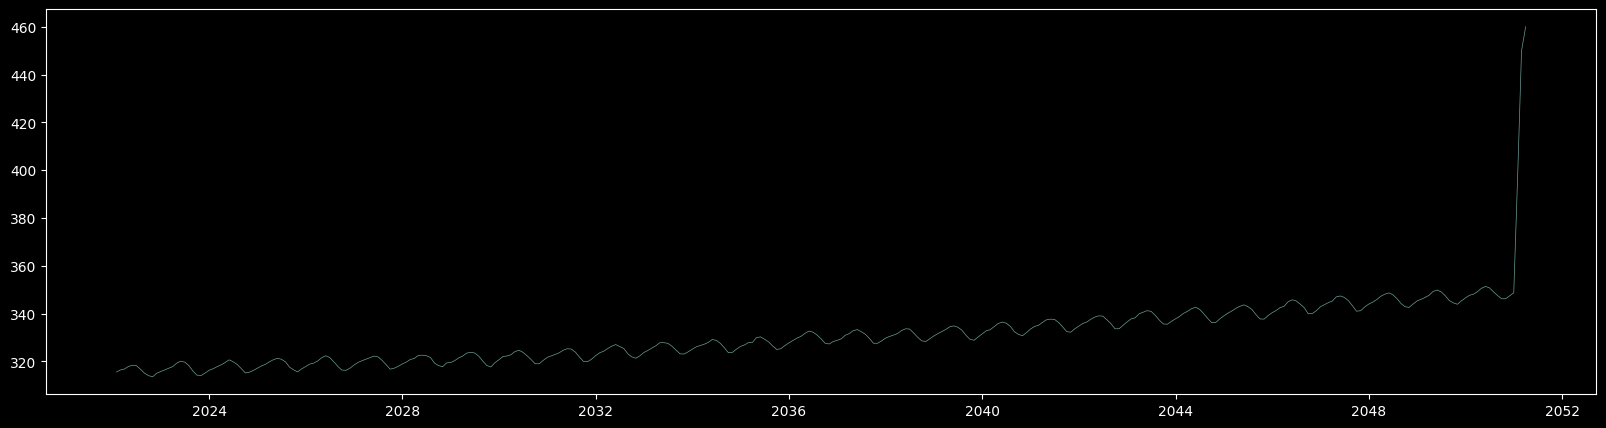

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# Plot
fig = plt.figure(figsize=(20,5))
plt.plot(co2, linewidth=0.5, alpha=0.75, label='Close');

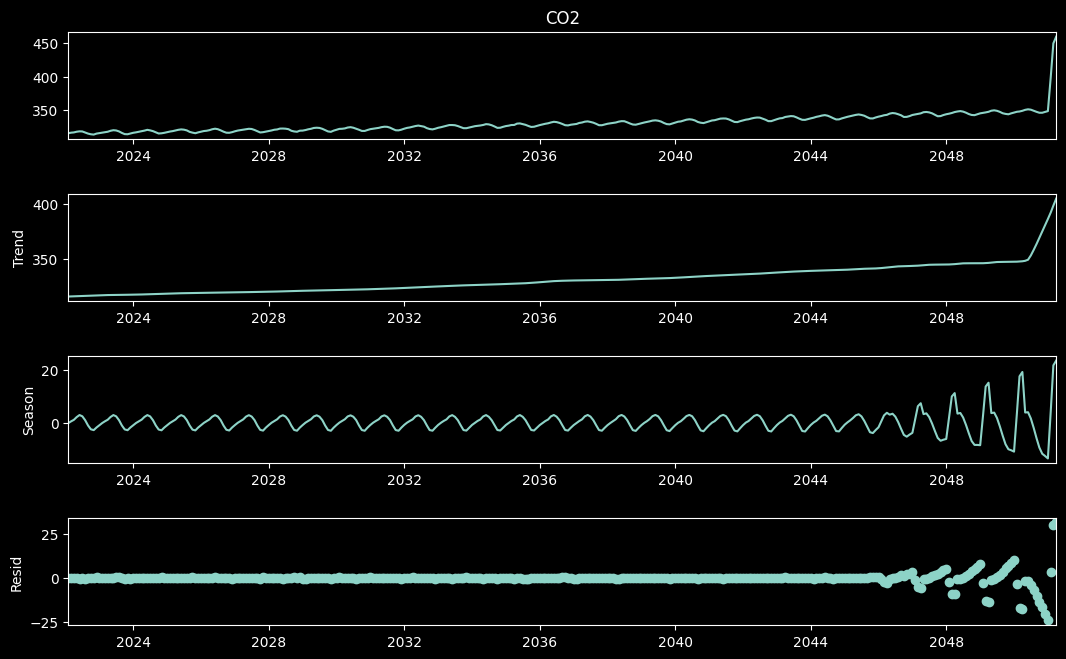

In [96]:
from statsmodels.tsa.seasonal import STL
# Odd num : seasonal = 13(연도별) / seasonal = 5(분기별) / seasonal = 7(주별)
stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(12, 7)

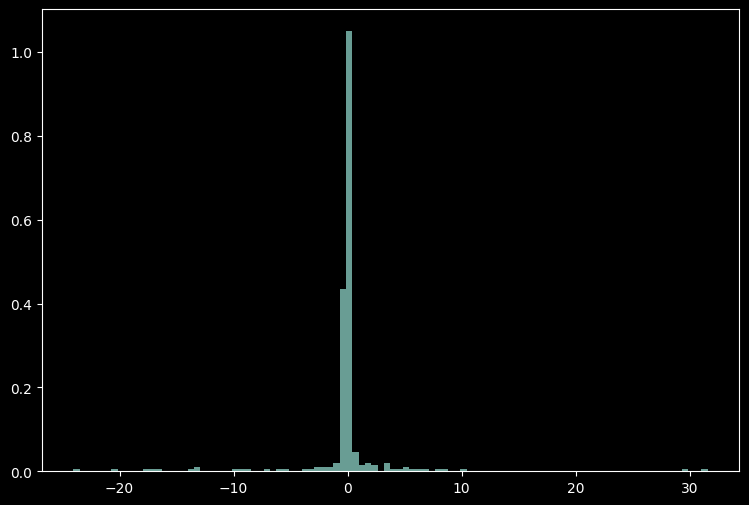

In [97]:
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(res.resid, 100, density=True, alpha=0.75)

In [98]:
from statsmodels.stats.weightstats import ztest
r = res.resid.values
st, p = ztest(r)
print(st,p)  

-0.6506146684262828 0.5152952591180103


In [99]:
mu, std = res.resid.mean(), res.resid.std()
print("평균:", mu, "표준편차:", std)

# 3-sigma(표준편차)를 기준으로 이상치 판단
print("이상치 갯수:", len(res.resid[(res.resid>mu+3*std)|(res.resid<mu-3*std)]))
# 이상치 갯수: 10

평균: -0.13473483767402747 표준편차: 3.879802434937742
이상치 갯수: 10


In [100]:
co2[res.resid[(res.resid>mu+3*std)|(res.resid<mu-3*std)].index]

2049-02-28    346.72
2049-03-31    347.63
2050-02-28    348.07
2050-03-31    349.12
2050-09-30    346.20
2050-10-31    346.20
2050-11-30    347.44
2050-12-31    348.67
2051-02-28    450.00
2051-03-31    460.00
Name: CO2, dtype: float64

In [103]:
co2_df = co2.reset_index()
print(co2_df[co2_df['index'] == '2049-02-28'].index)
print(co2_df[co2_df['index'] == '2049-03-31'].index)
print(co2_df[co2_df['index'] == '2050-02-28'].index)
print(co2_df[co2_df['index'] == '2050-03-31'].index)
print(co2_df[co2_df['index'] == '2050-09-30'].index)
print(co2_df[co2_df['index'] == '2050-10-31'].index)
print(co2_df[co2_df['index'] == '2050-11-30'].index)
print(co2_df[co2_df['index'] == '2050-12-31'].index)
print(co2_df[co2_df['index'] == '2051-02-28'].index)
print(co2_df[co2_df['index'] == '2051-03-31'].index)

Int64Index([325], dtype='int64')
Int64Index([326], dtype='int64')
Int64Index([337], dtype='int64')
Int64Index([338], dtype='int64')
Int64Index([344], dtype='int64')
Int64Index([345], dtype='int64')
Int64Index([346], dtype='int64')
Int64Index([347], dtype='int64')
Int64Index([349], dtype='int64')
Int64Index([350], dtype='int64')


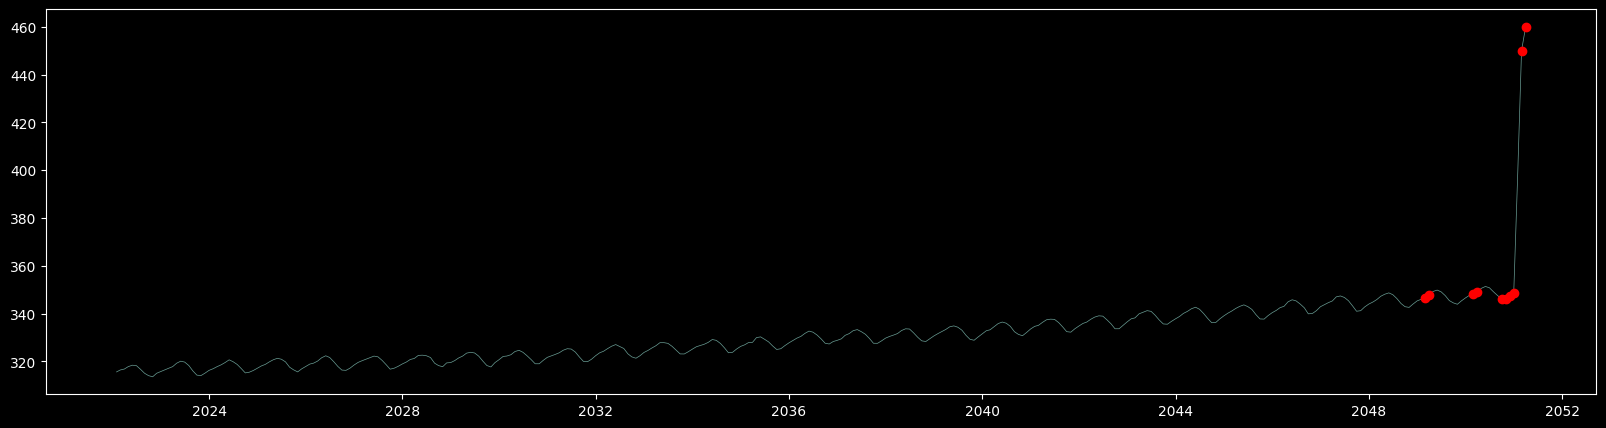

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])
fig = plt.figure(figsize=(20,5))

plt.plot(co2, linewidth=0.5, alpha=0.75, label='Close');
plt.plot(co2, 'or', markevery=[325, 326, 337, 338, 344, 345, 346, 347, 349, 350]);